# Clase 10
## Web scrapping

In [12]:
import requests # Explicar requests
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

Ahora si, vamos a probar descargar la información sobre 

In [3]:
link_api='https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationStatus?'

credenciales = {
    "client_id": "f3429f52737b4e019607007f7454602f",
    "client_secret": "E09120C8BC17468fBd98Bd7F37173674"
}


Estamos desautorizados (?) porque no pusimos las credenciales. Para hacerlo, tenemos que incluir las mismas dentro del parámetro **params**

In [4]:
response = requests.get(link_api, params=credenciales)
response.status_code

200

Para poder abrirlo, vamos a tener que usar **json()** y veremos la estructura de los datos.

## Vamos a analizar la información actual (tiempo real) de las estaciones

Algo lindo sería analizar si hay estaciones o barrios que les vendría bien tener más bicis. Para eso, vamos a tener que ir al endpoint https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationStatus?


Vamos a responder las siguientes preguntas:
1. ¿Cómo calcularías la disponibilidad de bicis de una estación? Es decir, ¿Cuán usada es una estación?
2. ¿Las estaciones con más capacidad son las más usadas?
3. ¿Cómo podríamos identificar barrios con estaciones que sean poco usadas?

In [5]:

link_api='https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationInformation?'


response = requests.get(link_api, params= credenciales)
estaciones_info = response.json()

estaciones_info_df = pd.DataFrame(estaciones_info["data"])
estaciones_info_df = pd.json_normalize(estaciones_info_df['stations'])
estaciones_info_df

,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,rental_methods,groups,obcn,short_name,nearby_distance,_ride_code_support,cross_street
0,2,002 - Retiro I,SMARTLITMAPFRAME,-34.592424,-58.374710,0.0,AV. Dr. José María Ramos Mejía 1300,11111,40,False,"[KEY, TRANSITCARD, PHONE]",[RETIRO],,,1000.0,True,NaN
1,3,003 - ADUANA,SMARTLITMAPFRAME,-34.612207,-58.369129,NaN,Av. Paseo Colón 380,C1063,28,False,"[KEY, TRANSITCARD, PHONE]",[MONSERRAT],NaN,NaN,1000.0,True,.
2,4,004 - Plaza Roma,SMARTLITMAPFRAME,-34.603008,-58.368856,0.0,Av. Corrientes 100,11111,20,False,"[KEY, TRANSITCARD, PHONE]",[SAN NICOLAS],,,1000.0,True,NaN
3,5,005 - Plaza Italia,SMARTLITMAPFRAME,-34.580550,-58.420954,0.0,Av. Sarmiento 2601,1111,42,False,"[KEY, TRANSITCARD, PHONE]",[PALERMO],,,1000.0,True,NaN
4,6,006 - Parque Lezama,SMARTLITMAPFRAME,-34.628526,-58.369758,0.0,"Avenida Martin Garcia, 295",1111,20,False,"[KEY, TRANSITCARD, PHONE]",[SAN TELMO],,,1000.0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,587,351 - PAYSANDU,SMARTLITMAPFRAME,-34.616370,-58.449870,0.0,Paysandú 573,C1405,20,False,"[KEY, TRANSITCARD, PHONE]",[CABALLITO],,,1000.0,True,NaN
395,588,400 - HIDALGO,SMARTLITMAPFRAME,-34.606153,-58.441754,0.0,Hidalgo 1210,C1414,16,False,"[KEY, TRANSITCARD, PHONE]",[VILLA CRESPO],,,1000.0,True,NaN
396,589,016 - MUSEO DEL AGUA,SMARTLITMAPFRAME,-34.600982,-58.395457,0.0,Viamonte 1994,C1056,16,False,"[KEY, TRANSITCARD, PHONE]",[BALVANERA],,,1000.0,True,NaN
397,590,392 - CHARCAS,SMARTLITMAPFRAME,-34.586866,-58.421426,0.0,Paraguay 4226,C1425,16,False,"[KEY, TRANSITCARD, PHONE]",[PALERMO],,,1000.0,True,NaN


¿Cuáles son las de Ciudad Universitaria?

In [6]:
estaciones_info_df[estaciones_info_df["name"].str.contains("CIUDAD UNIVERSITARIA", case=False, na=False)]


,station_id,name,physical_configuration,lat,lon,altitude,address,post_code,capacity,is_charging_station,rental_methods,groups,obcn,short_name,nearby_distance,_ride_code_support,cross_street
257,420,375 - Ciudad Universitaria I,SMARTLITMAPFRAME,-34.543705,-58.440976,NaN,INTENDENTE GUIRALDES 2610 - CERO MAS INFINITO,1111,12,False,"[KEY, TRANSITCARD, PHONE]",[BELGRANO],,,1000.0,True,NaN
282,464,377 - CIUDAD UNIVERSITARIA III,SMARTLITMAPFRAME,-34.541000,-58.444100,0.0,Intendente Guiraldes 2160 - Pabellón III,1111,20,False,"[KEY, TRANSITCARD, PHONE]",[BELGRANO],,,1000.0,True,NaN


In [7]:
link_api='https://apitransporte.buenosaires.gob.ar/ecobici/gbfs/stationStatus?'

response = requests.get(link_api, params= credenciales)
estaciones_status = response.json()

estaciones_status_df = pd.DataFrame(estaciones_status["data"])
estaciones_status_df = pd.json_normalize(estaciones_status_df['stations'])
estaciones_status_df

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike
0,2,22,3,15,0,1745871745,False,IN_SERVICE,1,1,1,None,22,0
1,3,2,2,24,0,1745882741,False,IN_SERVICE,1,1,1,None,2,0
2,4,1,0,19,0,1745882799,False,IN_SERVICE,1,1,1,None,1,0
3,5,2,0,40,0,1745871742,False,IN_SERVICE,1,1,1,None,2,0
4,6,7,3,10,1,1745882831,False,IN_SERVICE,1,1,1,None,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,587,17,0,3,0,1745882867,False,IN_SERVICE,1,1,1,None,17,0
395,588,4,2,10,0,1745882748,False,IN_SERVICE,1,1,1,None,4,0
396,589,1,6,9,1,1745882744,False,IN_SERVICE,1,1,1,None,1,0
397,590,1,0,15,0,1745882786,False,IN_SERVICE,1,1,1,None,1,0


In [8]:
estaciones_status_df["station_id"] = estaciones_status_df["station_id"].astype(int) 

In [14]:
datos_filtrados = estaciones_status_df[(estaciones_status_df["station_id"] == 420) | (estaciones_status_df["station_id"] == 464)]
datos_filtrados


,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike
257,420,3,1,8,0,1745879801,False,IN_SERVICE,1,1,1,None,3,0
282,464,18,2,0,0,1745882876,False,IN_SERVICE,1,1,1,None,18,0


In [21]:
hoy = datetime.today().strftime('%Y-%m-%d')
ahora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
dia = datetime.now().strftime('%A')  

In [22]:
datos_filtrados["Date"] = hoy
datos_filtrados["hora"] = ahora
datos_filtrados["dia"] = dia
datos_filtrados

C:\Users\Fede\AppData\Local\Temp\ipykernel_10292\696488582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados["Date"] = hoy
C:\Users\Fede\AppData\Local\Temp\ipykernel_10292\696488582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados["hora"] = ahora
C:\Users\Fede\AppData\Local\Temp\ipykernel_10292\696488582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,Date,hora,dia
257,420,3,1,8,0,1745879801,False,IN_SERVICE,1,1,1,None,3,0,2025-04-28,2025-04-28 20:33:35,Monday
282,464,18,2,0,0,1745882876,False,IN_SERVICE,1,1,1,None,18,0,2025-04-28,2025-04-28 20:33:35,Monday


In [23]:
full_data = datos_filtrados.iloc[0:0]
full_data

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,Date,hora,dia


In [24]:
full_data.to_csv("full_data.csv", index=False)

In [48]:
pd.read_csv("full_data.csv")

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike


In [39]:
full_data = pd.concat([full_data, datos_filtrados], ignore_index=True)

print(full_data)

   station_id  num_bikes_available  num_bikes_disabled  num_docks_available  \
0         420                    4                   1                    7   
1         464                   17                   2                    1   
2         420                    4                   1                    7   
3         464                   17                   2                    1   
4         420                    4                   1                    7   
5         464                   17                   2                    1   

   num_docks_disabled  last_reported  is_charging_station      status  \
0                   0     1745879062                False  IN_SERVICE   
1                   0     1745879078                False  IN_SERVICE   
2                   0     1745879062                False  IN_SERVICE   
3                   0     1745879078                False  IN_SERVICE   
4                   0     1745879062                False  IN_SERVICE   
5       

vamos a ver que usando lo que hicimos antes ["data"]["stations"] no terminamos de obtener un dataframe como antes

In [245]:
estaciones_estado["data"]["stations"]

[{'station_id': '2',
  'num_bikes_available': 1,
  'num_bikes_available_types': {'mechanical': 1, 'ebike': 0},
  'num_bikes_disabled': 3,
  'num_docks_available': 36,
  'num_docks_disabled': 0,
  'last_reported': 1745848802,
  'is_charging_station': False,
  'status': 'IN_SERVICE',
  'is_installed': 1,
  'is_renting': 1,
  'is_returning': 1,
  'traffic': None},
 {'station_id': '3',
  'num_bikes_available': 8,
  'num_bikes_available_types': {'mechanical': 8, 'ebike': 0},
  'num_bikes_disabled': 2,
  'num_docks_available': 18,
  'num_docks_disabled': 0,
  'last_reported': 1745848896,
  'is_charging_station': False,
  'status': 'IN_SERVICE',
  'is_installed': 1,
  'is_renting': 1,
  'is_returning': 1,
  'traffic': None},
 {'station_id': '4',
  'num_bikes_available': 11,
  'num_bikes_available_types': {'mechanical': 11, 'ebike': 0},
  'num_bikes_disabled': 0,
  'num_docks_available': 9,
  'num_docks_disabled': 0,
  'last_reported': 1745848910,
  'is_charging_station': False,
  'status': 'I

Vamos a tener que usar una función más de pandas **json_normalize**

In [252]:
estaciones_estado_df = pd.DataFrame(estaciones_estado["data"])
estaciones_estado_df = pd.json_normalize(estaciones_estado_df['stations'])
estaciones_estado_df

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike
0,2,1,3,36,0,1745848802,False,IN_SERVICE,1,1,1,None,1,0
1,3,8,2,18,0,1745848896,False,IN_SERVICE,1,1,1,None,8,0
2,4,11,0,9,0,1745848910,False,IN_SERVICE,1,1,1,None,11,0
3,5,1,0,41,0,1745848935,False,IN_SERVICE,1,1,1,None,1,0
4,6,14,1,5,0,1745848829,False,IN_SERVICE,1,1,1,None,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,587,2,0,18,0,1745848854,False,IN_SERVICE,1,1,1,None,2,0
395,588,10,2,4,0,1745848878,False,IN_SERVICE,1,1,1,None,10,0
396,589,3,5,8,1,1745848809,False,IN_SERVICE,1,1,1,None,3,0
397,590,3,0,13,0,1745848815,False,IN_SERVICE,1,1,1,None,3,0


Una posibilidad es calcular la **capacidad actual** como la suma entre las bicis disponibles y los docs disponibles
La **disponibilidad** a mi se me ocurrió calcularla como la cantidad de bicis disponibles dividido por la capacidad actual

In [254]:
estaciones_estado_df["capacidad_actual"] = estaciones_estado_df["num_bikes_available"] + estaciones_estado_df["num_docks_available"]
estaciones_estado_df["disponibilidad"] = estaciones_estado_df["num_bikes_available"]/ estaciones_estado_df["capacidad_actual"]

In [255]:
estaciones_estado_df.sort_values(by="capacidad_actual", ascending=False)

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,capacidad_actual,disponibilidad
113,175,3,6,45,1,1745848821,False,IN_SERVICE,1,1,1,None,3,0,48,0.062500
3,5,1,0,41,0,1745848935,False,IN_SERVICE,1,1,1,None,1,0,42,0.023810
0,2,1,3,36,0,1745848802,False,IN_SERVICE,1,1,1,None,1,0,37,0.027027
83,130,3,7,30,0,1745848822,False,IN_SERVICE,1,1,1,None,3,0,33,0.090909
63,94,25,0,5,0,1745812738,False,IN_SERVICE,1,1,1,None,25,0,30,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,493,3,0,5,0,1745848810,False,IN_SERVICE,1,1,1,None,3,0,8,0.375000
252,413,7,1,0,0,1745848908,False,IN_SERVICE,1,1,1,None,7,0,7,1.000000
214,348,4,6,2,0,1745848841,False,IN_SERVICE,1,1,1,None,4,0,6,0.666667
285,468,0,4,4,0,1745848961,False,IN_SERVICE,1,1,1,None,0,0,4,0.000000


2. ¿Las estaciones con más capacidad son las más usadas?

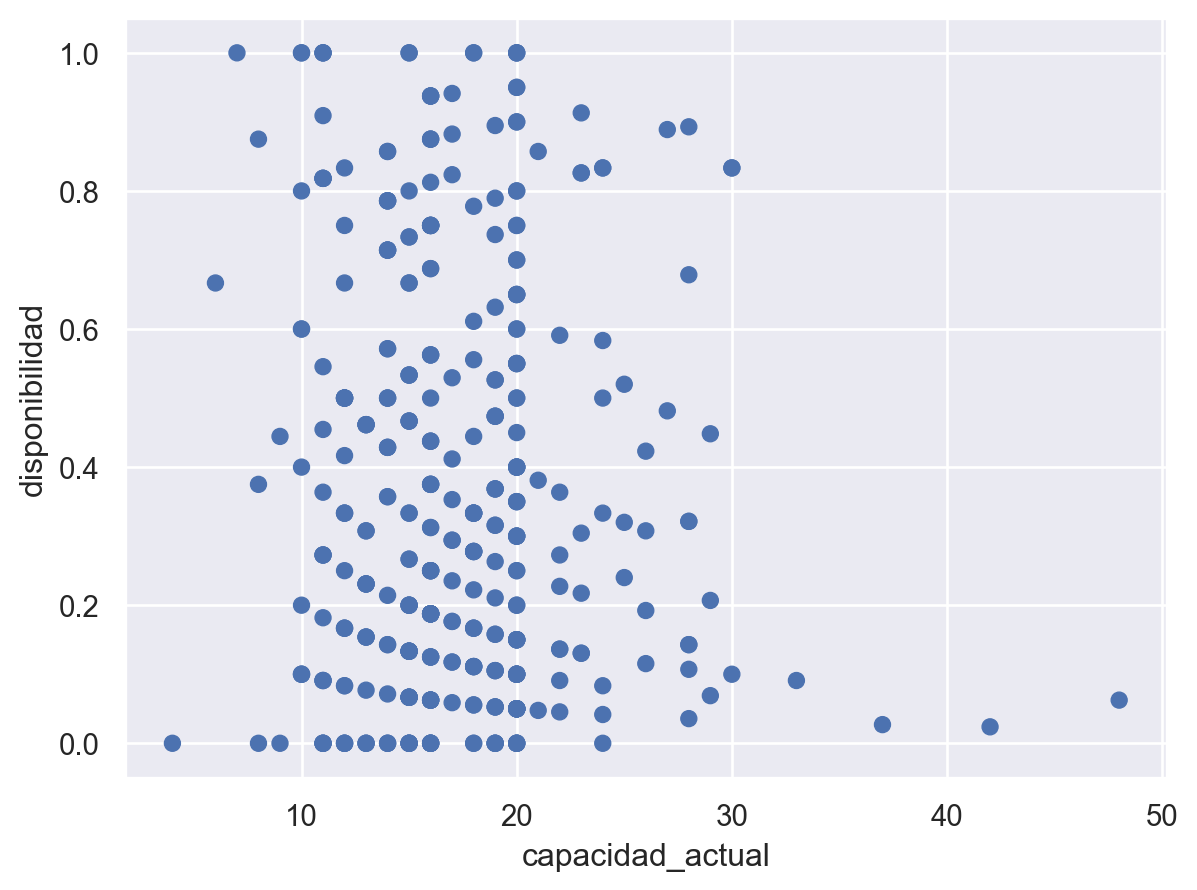

In [256]:
(
    so.Plot(data = estaciones_estado_df, x = "capacidad_actual", y = "disponibilidad")
    .add(so.Dot())
)

3. ¿Cómo podríamos identificar barrios con estaciones que sean poco usadas?

In [257]:
estaciones_estado_df["groups"] = estaciones_info_df["groups"]

In [258]:
estaciones_estado_df.groupby("groups")["disponibilidad"].mean().sort_values()

groups
VILLA LUGANO           0.027778
CONSTITUCION           0.049113
COLEGIALES             0.075019
COGHLAN                0.102810
VILLA ORTUZAR          0.159183
Nuñez                  0.172570
PARQUE CHAS            0.181524
RETIRO                 0.186866
VELEZ SARFIELD         0.197386
VILLA RIACHUELO        0.200000
ZONA 1                 0.230150
SAN CRISTOBAL          0.233333
SAN TELMO              0.249525
MONSERRAT              0.267646
AGRONOMIA              0.268611
BALVANERA              0.277145
VILLA DEVOTO           0.280280
RECOLETA               0.285768
SAN NICOLAS            0.298081
VILLA URQUIZA          0.298130
PALERMO                0.301936
CABALLITO              0.310433
VILLA CRESPO           0.317379
VILLA DEL PARQUE       0.320498
DEVOTO                 0.324444
VILLA PUYRREDON        0.342308
VILLA SOLDATI          0.348958
VILLA SANTA RITA       0.363135
FLORES                 0.384942
ALMAGRO                0.392076
SAAVEDRA               0.396242
B

In [259]:
estaciones_estado_df.groupby("groups")["disponibilidad"].mean().sort_values(ascending=False)

groups
NUEVA POMPEYA          0.844675
MATADEROS              0.808333
PARQUE AVELLANEDA      0.791071
VILLA LURO             0.749206
LINIERS                0.745000
FLORESTA               0.739130
BARRACAS               0.653442
PARQUE CHACABUCO       0.647852
VILLA GENERAL MITRE    0.644048
MONTE CASTRO           0.577652
PARQUE PATRICIOS       0.556818
VILLA REAL             0.533333
PUERTO MADERO          0.524706
PATERNAL               0.473313
VERSALLES              0.438889
BELGRANO               0.436238
BOCA                   0.432126
BOEDO                  0.422023
SAAVEDRA               0.396242
ALMAGRO                0.392076
FLORES                 0.384942
VILLA SANTA RITA       0.363135
VILLA SOLDATI          0.348958
VILLA PUYRREDON        0.342308
DEVOTO                 0.324444
VILLA DEL PARQUE       0.320498
VILLA CRESPO           0.317379
CABALLITO              0.310433
PALERMO                0.301936
VILLA URQUIZA          0.298130
SAN NICOLAS            0.298081
R

## API wrappers

Finalmente, existen los API wrappers, que son librerías que actúa como una capa de abstracción sobre una API. Su propósito es facilitar el acceso a la API sin que el usuario tenga que hacer llamadas HTTP manuales. Wikipedia por ejemplo tiene este tipo de wrappers. También hay librerias como https://github.com/federicorabanos/LanusStats/tree/main que no son APIs pero funcionan un poco como si lo fueran ya que scrappean las páginas de forma muy eficiente.